<a href="https://colab.research.google.com/github/tyagisumalini/MLProject/blob/main/EDA_22Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# ML project

**Exploratory Data Analysis**

**Initialize Spark**

In [3]:
# Spark init

!wget -q https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz 
!tar xf spark-3.1.2-bin-hadoop2.7.tgz
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"
!pip install -q findspark
import findspark
findspark.init()

In [4]:
# Import Spark Context 
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName("First Spark App").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)


In [5]:
# Import pyspark session

from pyspark.sql.types import *

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


In [6]:
# from pyspark import SparkContext
# from pyspark import SparkConf
# from pyspark.sql import SparkSession
# conf = SparkConf().setAppName("My Spark App").setMaster("local")
# sc = SparkContext(conf=conf)
# spark = SparkSession(sc)

In [7]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load The Data**

In [207]:
# Read the data from raw files for 2015 and 2016 
df_raw_data_2016 = spark.read.csv('/content/drive/MyDrive/data/Uber_JAN_JUNE16.csv', sep=',', header=True)
df_raw_data_2015 = spark.read.csv('/content/drive/MyDrive/data/Uber_JAN_JUNE15.csv', sep=',', header=True)

In [208]:
# Display head to check the data read into dataframes

df_raw_data_2016.head(5)

[Row(id='id0190469', vendor_id='2', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='5', pickup_longitude='-73.8095459', pickup_latitude='40.76835159', store_and_fwd_flag='N', trip_duration='849'),
 Row(id='id1665586', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='1', pickup_longitude='-73.8683956', pickup_latitude='40.7633522', store_and_fwd_flag='N', trip_duration='1294'),
 Row(id='id1210365', vendor_id='2', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='5', pickup_longitude='-73.8095459', pickup_latitude='40.76835159', store_and_fwd_flag='N', trip_duration='408'),
 Row(id='id3888279', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/2016', passenger_count='1', pickup_longitude='-73.8683956', pickup_latitude='40.7633522', store_and_fwd_flag='N', trip_duration='280'),
 Row(id='id0924227', vendor_id='1', pickup_datetime='01/01/2016', dropoff_datetime='01/01/201

In [209]:
# Drop the columns that are not needed from the dataframe and store it in a new clean dataframe

cols =['id','vendor_id','dropoff_datetime','passenger_count','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration']

df_raw_data_2016_clean= df_raw_data_2016.drop(*cols)

In [210]:
# Display clean dataframe to ensure the columns are dropped

df_raw_data_2016_clean.head(5)

[Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8095459', pickup_latitude='40.76835159'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8683956', pickup_latitude='40.7633522'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8095459', pickup_latitude='40.76835159'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.8683956', pickup_latitude='40.7633522'),
 Row(pickup_datetime='01/01/2016', pickup_longitude='-73.78371636', pickup_latitude='40.73489449')]

In [211]:
# Drop  columns that are not needed from the dataframe and store it in a new clean dataframe

cols =['Dispatching_base_num','Affiliated_base_num','locationID']

df_raw_data_2015_clean= df_raw_data_2015.drop(*cols)

In [212]:
# Display clean dataframe to ensure the columns are dropped

df_raw_data_2015_clean.head(5)

[Row(Pickup_date='03/22/2015', PICKUP_LATITUDE='40.59995429', PICKUP_LONGITUDE='-73.96433367'),
 Row(Pickup_date='03/22/2015', PICKUP_LATITUDE='40.7338989', PICKUP_LONGITUDE='-73.76881576'),
 Row(Pickup_date='03/22/2015', PICKUP_LATITUDE='40.76622978', PICKUP_LONGITUDE='-73.95723115'),
 Row(Pickup_date='03/22/2015', PICKUP_LATITUDE='40.76398618', PICKUP_LONGITUDE='-73.89935346'),
 Row(Pickup_date='03/22/2015', PICKUP_LATITUDE='40.70213161', PICKUP_LONGITUDE='-73.996592')]

In [213]:
# Combine the two dataframes into one

unionDF = df_raw_data_2016_clean.union(df_raw_data_2015_clean)
unionDF.show(truncate=False)
unionDF.count()

+---------------+----------------+---------------+
|pickup_datetime|pickup_longitude|pickup_latitude|
+---------------+----------------+---------------+
|01/01/2016     |-73.8095459     |40.76835159    |
|01/01/2016     |-73.8683956     |40.7633522     |
|01/01/2016     |-73.8095459     |40.76835159    |
|01/01/2016     |-73.8683956     |40.7633522     |
|01/01/2016     |-73.78371636    |40.73489449    |
|01/01/2016     |-73.96236332    |40.68796681    |
|01/01/2016     |-73.9814305     |40.58840282    |
|01/01/2016     |-73.81945922    |40.67615527    |
|01/01/2016     |-73.8884369     |40.64679238    |
|01/01/2016     |-73.89975124    |40.63804206    |
|01/01/2016     |-73.97390784    |40.79037998    |
|01/01/2016     |-73.8630363     |40.75257951    |
|01/01/2016     |-73.7644889     |40.66218792    |
|01/01/2016     |-73.97488148    |40.69079511    |
|01/01/2016     |-73.91364751    |40.67663762    |
|01/01/2016     |-73.90591108    |40.86526568    |
|01/01/2016     |-73.91597421  

2097150

In [214]:
# Display schema

unionDF.printSchema()

root
 |-- pickup_datetime: string (nullable = true)
 |-- pickup_longitude: string (nullable = true)
 |-- pickup_latitude: string (nullable = true)



In [215]:
# Change the dataype of the latitiude column
unionDF = unionDF.withColumn("pickup_latitude", unionDF['pickup_latitude'].\
           								cast(FloatType()))

In [216]:
# Chsnge the datatype of the longitude column
unionDF = unionDF.withColumn("pickup_longitude", unionDF['pickup_longitude'].\
           								cast(FloatType()))

In [217]:
# Convert the datetime column data type to date data type

from datetime import datetime

from pyspark.sql.functions import col, udf

from pyspark.sql.types import DateType

# Setting an user define function:

# This function converts the string cell into a date:

func =  udf (lambda x: datetime.strptime(x, '%m/%d/%Y'), DateType())

unionDF = unionDF.withColumn('Date', func(col('pickup_datetime')))

# SHow and print the schema post conversion to ensure the changes were made
unionDF.show()

unionDF.printSchema()

+---------------+----------------+---------------+----------+
|pickup_datetime|pickup_longitude|pickup_latitude|      Date|
+---------------+----------------+---------------+----------+
|     01/01/2016|       -73.80955|      40.768353|2016-01-01|
|     01/01/2016|       -73.86839|       40.76335|2016-01-01|
|     01/01/2016|       -73.80955|      40.768353|2016-01-01|
|     01/01/2016|       -73.86839|       40.76335|2016-01-01|
|     01/01/2016|      -73.783714|      40.734894|2016-01-01|
|     01/01/2016|      -73.962364|      40.687965|2016-01-01|
|     01/01/2016|       -73.98143|        40.5884|2016-01-01|
|     01/01/2016|       -73.81946|      40.676155|2016-01-01|
|     01/01/2016|      -73.888435|      40.646793|2016-01-01|
|     01/01/2016|       -73.89975|      40.638042|2016-01-01|
|     01/01/2016|       -73.97391|       40.79038|2016-01-01|
|     01/01/2016|       -73.86304|       40.75258|2016-01-01|
|     01/01/2016|       -73.76449|       40.66219|2016-01-01|
|     01

In [218]:
# Drop the datetime column of string type 
cols =['pickup_datetime']

unionDF= unionDF.drop(*cols)

In [219]:
# Display clean dataframe

unionDF.show()

+----------------+---------------+----------+
|pickup_longitude|pickup_latitude|      Date|
+----------------+---------------+----------+
|       -73.80955|      40.768353|2016-01-01|
|       -73.86839|       40.76335|2016-01-01|
|       -73.80955|      40.768353|2016-01-01|
|       -73.86839|       40.76335|2016-01-01|
|      -73.783714|      40.734894|2016-01-01|
|      -73.962364|      40.687965|2016-01-01|
|       -73.98143|        40.5884|2016-01-01|
|       -73.81946|      40.676155|2016-01-01|
|      -73.888435|      40.646793|2016-01-01|
|       -73.89975|      40.638042|2016-01-01|
|       -73.97391|       40.79038|2016-01-01|
|       -73.86304|       40.75258|2016-01-01|
|       -73.76449|       40.66219|2016-01-01|
|      -73.974884|      40.690796|2016-01-01|
|       -73.91365|      40.676636|2016-01-01|
|      -73.905914|      40.865265|2016-01-01|
|       -73.91598|      40.852524|2016-01-01|
|       -73.79096|      40.694427|2016-01-01|
|       -73.76114|       40.71064|

In [139]:
# # Can be removed later as we will not round our data anymore- DO NOT RUN
# from pyspark.sql.functions import round, col
# unionDF.select("*", round(col('pickup_latitude'),4),round(col('pickup_longitude'),4)).show()

In [22]:
#Run line 28

#Feature Engineering

In [23]:
# Import the needed functions to add features
from pyspark.sql.functions import *
from pyspark.sql.types import *


In [24]:
# Break down the data to include day of the month

unionDF = unionDF.withColumn("day", dayofmonth("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+
|pickup_longitude|pickup_latitude|      Date|day|
+----------------+---------------+----------+---+
|       -73.80955|      40.768353|2016-01-01|  1|
|       -73.86839|       40.76335|2016-01-01|  1|
+----------------+---------------+----------+---+
only showing top 2 rows



In [25]:
# Break down the data to include the month

unionDF = unionDF.withColumn("month", month("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+-----+
|pickup_longitude|pickup_latitude|      Date|day|month|
+----------------+---------------+----------+---+-----+
|       -73.80955|      40.768353|2016-01-01|  1|    1|
|       -73.86839|       40.76335|2016-01-01|  1|    1|
+----------------+---------------+----------+---+-----+
only showing top 2 rows



In [26]:
# Break down the data to include the year

unionDF = unionDF.withColumn("Year", year("Date"))
unionDF.show(2)

+----------------+---------------+----------+---+-----+----+
|pickup_longitude|pickup_latitude|      Date|day|month|Year|
+----------------+---------------+----------+---+-----+----+
|       -73.80955|      40.768353|2016-01-01|  1|    1|2016|
|       -73.86839|       40.76335|2016-01-01|  1|    1|2016|
+----------------+---------------+----------+---+-----+----+
only showing top 2 rows



In [27]:
# Break down the data to include day of the week

unionDF = unionDF.withColumn("dayofweek", date_format("date", 'E'))
unionDF.show(2)

+----------------+---------------+----------+---+-----+----+---------+
|pickup_longitude|pickup_latitude|      Date|day|month|Year|dayofweek|
+----------------+---------------+----------+---+-----+----+---------+
|       -73.80955|      40.768353|2016-01-01|  1|    1|2016|      Fri|
|       -73.86839|       40.76335|2016-01-01|  1|    1|2016|      Fri|
+----------------+---------------+----------+---+-----+----+---------+
only showing top 2 rows



#Data Exploration


Number of Trips in Year

In [28]:
# Prepare the data to plot Yearly data

n_trips_of_year = unionDF.groupby('Year').count().orderBy('year')
n_trips_of_year.show(2)

+----+-------+
|Year|  count|
+----+-------+
|2015|1048575|
|2016|1048575|
+----+-------+



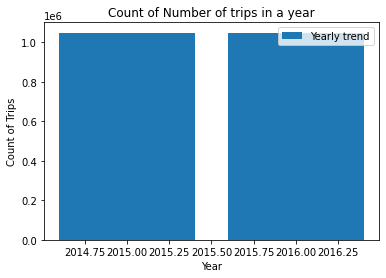

In [29]:
# Plotting the count of number of trips in a year

import matplotlib.pyplot as plt
import pandas


x= n_trips_of_year.toPandas()['Year'].values.tolist()

y= n_trips_of_year.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Yearly trend")
plt.plot()

plt.xlabel("Year")
plt.ylabel("Count of Trips")
plt.title("Count of Number of trips in a year")
plt.legend()
plt.show()

**Number of Trips in months**

In [30]:
n_trips_month = unionDF.groupby(unionDF["month"]).count()
n_trips_month.show(2)

+-----+------+
|month| count|
+-----+------+
|    1|363483|
|    6|361203|
+-----+------+
only showing top 2 rows



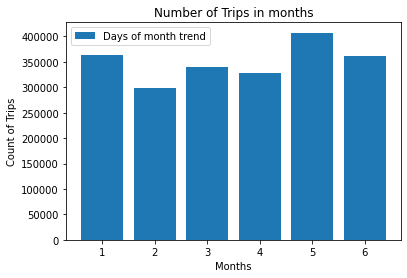

In [31]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_month.toPandas()['month'].values.tolist()

y= n_trips_month.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of month trend")
plt.plot()

plt.xlabel("Months")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in months")
plt.legend()
plt.show()

**Number of Trips in days of months**

In [32]:
n_trips_of_day = unionDF.groupby('day').count()
n_trips_of_day.show(2)

+---+-----+
|day|count|
+---+-----+
| 31|52778|
| 28|80293|
+---+-----+
only showing top 2 rows



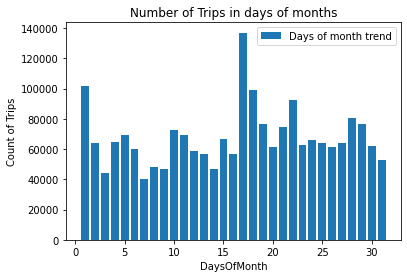

In [33]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_of_day.toPandas()['day'].values.tolist()

y= n_trips_of_day.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of month trend")
plt.plot()

plt.xlabel("DaysOfMonth")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in days of months")
plt.legend()
plt.show()

**Number of Trips in days of week**

In [34]:
n_trips_dayofweek = unionDF.groupby(unionDF["dayofweek"]).count()
n_trips_dayofweek.show(2)

+---------+------+
|dayofweek| count|
+---------+------+
|      Sun|305080|
|      Mon|288227|
+---------+------+
only showing top 2 rows



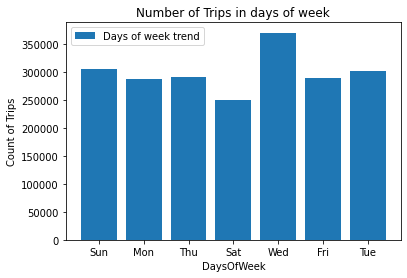

In [35]:
import matplotlib.pyplot as plt
import pandas


x= n_trips_dayofweek.toPandas()['dayofweek'].values.tolist()

y= n_trips_dayofweek.toPandas()["count"].values.tolist()

plt.bar(x , y  , label="Days of week trend")
plt.plot()

plt.xlabel("DaysOfWeek")
plt.ylabel("Count of Trips")
plt.title("Number of Trips in days of week")
plt.legend()
plt.show()

In [220]:
spark.read.option("multiline","true").json
% pip install geopandas
import geopandas as gpd
% pip install geopandas
import os.path, json, io
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)
! pip install retrying
from retrying import retry # for exponential back down when calling TurboOverdrive API

import pyspark.sql.functions as func # resuse as func.coalace for example
from pyspark.sql.types import StringType, IntegerType, FloatType, DoubleType,DecimalType
from pyspark.sql import SparkSession

import pandas as pd
from geopandas import GeoDataFrame # Loading boundaries Data
from shapely.geometry import shapely,Point, Polygon, shape # creating geospatial data
from shapely import wkb, wkt # creating and parsing geospatial data
from ast import literal_eval as make_tuple # used to decode data from java

In [221]:
# Read the geojson file

df_poly = gpd.read_file('/content/drive/MyDrive/data/2010NeighborhoodTabulationAreas.geojson')

ntacode        195
shape_area     195
county_fips    195
ntaname        195
shape_leng     195
boro_name      195
boro_code      195
geometry       195
dtype: int64

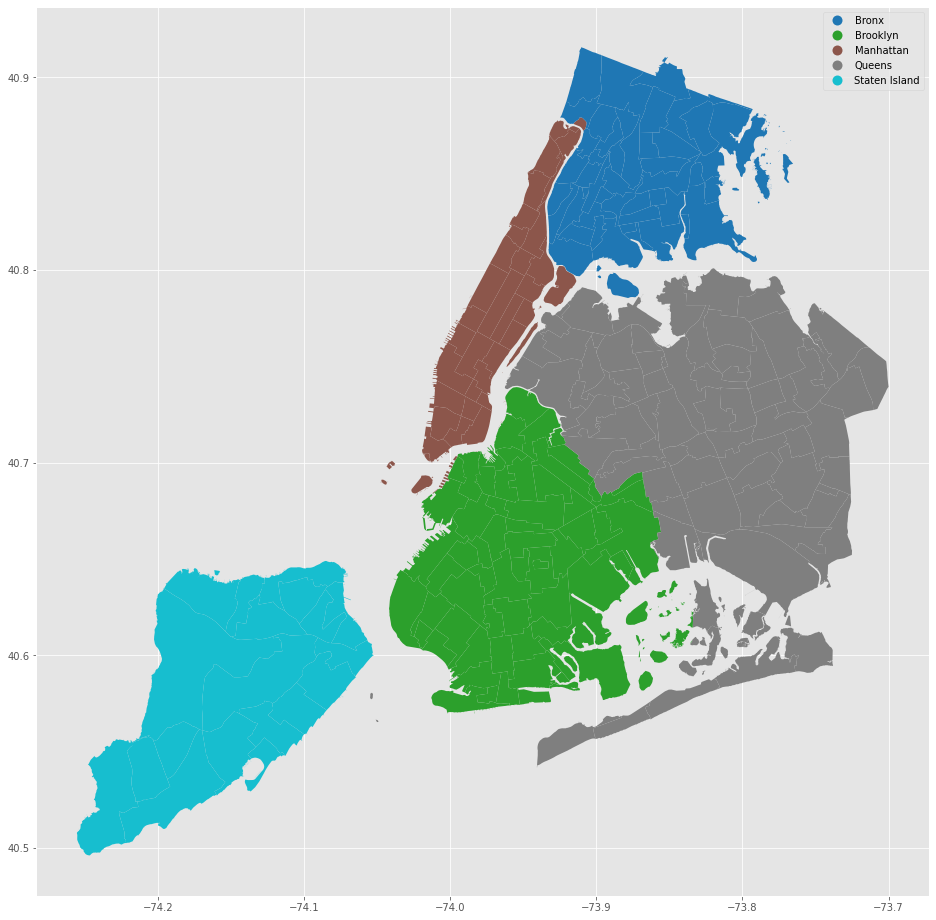

In [38]:
# Plot the multipolygon dataframe to check the areas available

df_poly.plot(column='boro_name', categorical=True, legend=True)
df_poly.count()

In [222]:
# This step was done to convert the multipolygon field into polygon
exploded = df_poly.explode(index_parts=True)
exploded

ntacode     shape_area county_fips                           ntaname  \
0   0    QN51  52488277.4492         081                       Murray Hill   
1   0    QN27   19726845.734         081                     East Elmhurst   
2   0    QN41  27774853.5522         081              Fresh Meadows-Utopia   
3   0    QN08  77412747.8943         081                        St. Albans   
4   0    BK69  20528197.0269         047                      Clinton Hill   
...       ...            ...         ...                               ...   
192 2    MN34  24494900.5685         061                 East Harlem North   
    3    MN34  24494900.5685         061                 East Harlem North   
    4    MN34  24494900.5685         061                 East Harlem North   
193 0    BX14  18221640.2327         005  East Concourse-Concourse Village   
194 0    BX34  17271763.8139         005    Melrose South-Mott Haven North   

          shape_leng  boro_name boro_code  \
0   0  33266.9048559     Queens         4   
1   0  19816.7117581     Queens         4   
2   0  22106.4312724     Queens         4   
3   0  45401.3167856     Queens         4   
4   0  23971.4662361   Brooklyn         3   
...              ...        ...       ...   
192 2  30603.7155941  Manhattan         1   
    3  30603.7155941  Manhattan         1   
    4  30603.7155941  Manhattan         1   
193 0  27199.9115779      Bronx         2   
194 0  19589.1955773      Bronx         2   

                                                geometry  
0   0  POLYGON ((-73.80379 40.77561, -73.80099 40.775...  
1   0  POLYGON ((-73.86110 40.76366, -73.85993 40.762...  
2   0  POLYGON ((-73.77758 40.73019, -73.77849 40.729...  
3   0  POLYGON ((-73.75205 40.70523, -73.75174 40.704...  
4   0  POLYGON ((-73.95337 40.68064, -73.95328 40.680...  
...                                                  ...  
192 2  POLYGON ((-73.92667 40.80018, -73.92670 40.800...  
    3  POLYGON ((-73.92689 40.80084, -73.92651 40.800...  
    4  POLYGON ((-73.93381 40.81651, -73.93383 40.815...  
193 0  POLYGON ((-73.90959 40.84276, -73.90962 40.842...  
194 0  POLYGON ((-73.90129 40.82048, -73.90160 40.819...  

[368 rows x 8 columns]

In [223]:
# This step was dont to convert a Polygon field to a point field

points = exploded.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid
points.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


,,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,0,QN51,52488277.4492,081,Murray Hill,33266.9048559,Queens,4,POINT (-73.80955 40.76835)
1,0,QN27,19726845.734,081,East Elmhurst,19816.7117581,Queens,4,POINT (-73.86840 40.76335)
2,0,QN41,27774853.5522,081,Fresh Meadows-Utopia,22106.4312724,Queens,4,POINT (-73.78372 40.73489)
3,0,QN08,77412747.8943,081,St. Albans,45401.3167856,Queens,4,POINT (-73.76315 40.69120)
4,0,BK69,20528197.0269,047,Clinton Hill,23971.4662361,Brooklyn,3,POINT (-73.96236 40.68797)


In [224]:
#This stored proc was created to convert the Points 
def geopandas_df_to_spark_df_for_points(gdf):
  gdf['lon'] = gdf['geometry'].x
  gdf['lat'] = gdf['geometry'].y
  sdf = spark.createDataFrame(pd.DataFrame(gdf).drop(['geometry'],axis = 1))
  return sdf

In [225]:
#This is the geopandas data into a spark dataframe, with points

spark_geo_df = geopandas_df_to_spark_df_for_points(points)
spark_geo_df.show()
spark_geo_df.count()

+-------+-------------+-----------+--------------------+-------------+-------------+---------+------------------+------------------+
|ntacode|   shape_area|county_fips|             ntaname|   shape_leng|    boro_name|boro_code|               lon|               lat|
+-------+-------------+-----------+--------------------+-------------+-------------+---------+------------------+------------------+
|   QN51|52488277.4492|        081|         Murray Hill|33266.9048559|       Queens|        4|-73.80954590112775| 40.76835158791797|
|   QN27| 19726845.734|        081|       East Elmhurst|19816.7117581|       Queens|        4| -73.8683955982344|40.763352201165496|
|   QN41|27774853.5522|        081|Fresh Meadows-Utopia|22106.4312724|       Queens|        4|-73.78371636114146| 40.73489448639481|
|   QN08|77412747.8943|        081|          St. Albans|45401.3167856|       Queens|        4| -73.7631460750064| 40.69120183506941|
|   BK69|20528197.0269|        047|        Clinton Hill|23971.4662361

368

ntacode        368
shape_area     368
county_fips    368
ntaname        368
shape_leng     368
boro_name      368
boro_code      368
geometry       368
lon            368
lat            368
dtype: int64

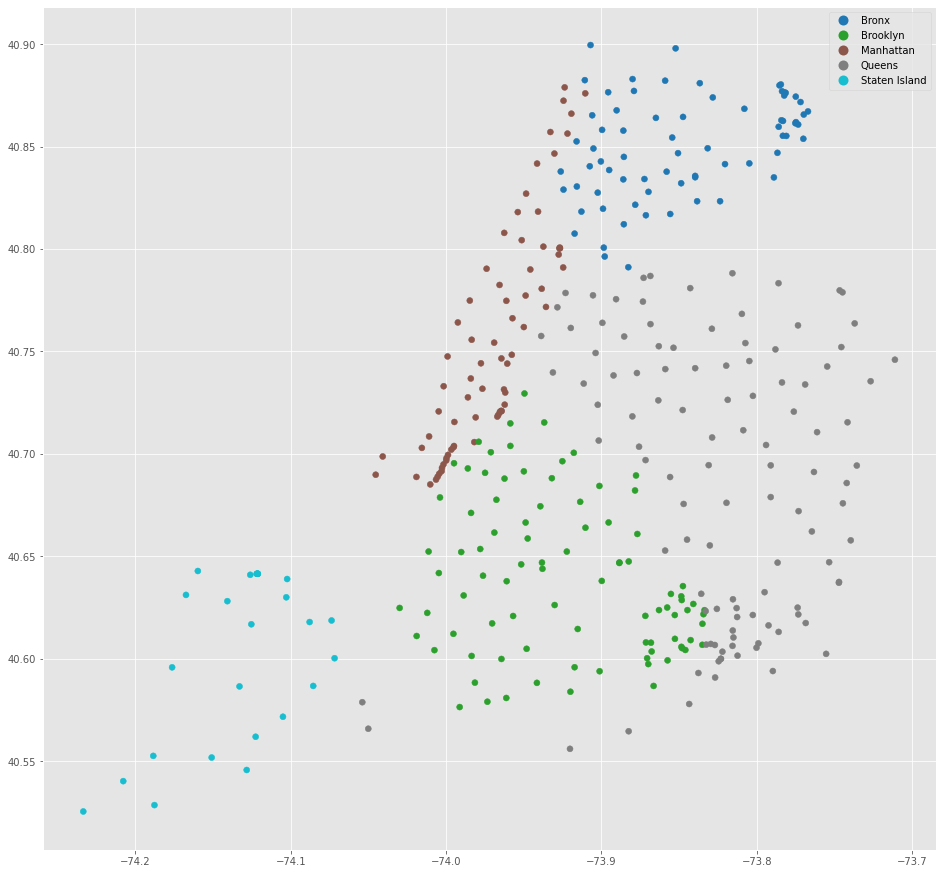

In [226]:
# Plotting the points post conversion to be able to visualize the data

points.plot(column='boro_name', categorical=True, legend=True)
points.count()

In [227]:
# Display the schema to ensure the data types are correct
spark_geo_df.printSchema()

root
 |-- ntacode: string (nullable = true)
 |-- shape_area: string (nullable = true)
 |-- county_fips: string (nullable = true)
 |-- ntaname: string (nullable = true)
 |-- shape_leng: string (nullable = true)
 |-- boro_name: string (nullable = true)
 |-- boro_code: string (nullable = true)
 |-- lon: double (nullable = true)
 |-- lat: double (nullable = true)



In [144]:
#  spark_geo_df = spark_geo_df.withColumn("lat", spark_geo_df['lat'].cast(StringType()))

In [146]:
#  spark_geo_df = spark_geo_df.withColumn("lon", spark_geo_df['lon'].cast(StringType()))

In [228]:
spark_geo_df = spark_geo_df.withColumn("lat", spark_geo_df['lat'].\
           								cast(FloatType()))

In [229]:
spark_geo_df = spark_geo_df.withColumn("lon", spark_geo_df['lon'].\
           								cast(FloatType()))

# change these to double later

In [230]:
df5= unionDF.filter(unionDF.pickup_latitude.isNull())
df5.count()

0

In [231]:
spark_geo_df.printSchema()

root
 |-- ntacode: string (nullable = true)
 |-- shape_area: string (nullable = true)
 |-- county_fips: string (nullable = true)
 |-- ntaname: string (nullable = true)
 |-- shape_leng: string (nullable = true)
 |-- boro_name: string (nullable = true)
 |-- boro_code: string (nullable = true)
 |-- lon: float (nullable = true)
 |-- lat: float (nullable = true)



In [234]:
# Join the two dataframes containing Uber and Neighborhood information

joined_df = spark_geo_df.join(unionDF, (spark_geo_df.lat ==  unionDF.pickup_latitude )& (spark_geo_df.lon ==  unionDF.pickup_longitude), how = "left_outer")

# joined_df.show()
# joined_df.collect()


In [95]:
# joined_df = joined_df.withColumn("lat", spark_geo_df['lat'].\
#            								cast(DoubleType()))



In [96]:
# joined_df = joined_df.withColumn("lon", spark_geo_df['lon'].\
#            								cast(DoubleType()))

In [235]:
joined_df = joined_df.withColumn("boro_code", spark_geo_df['boro_code'].\
           								cast(IntegerType()))


In [236]:
joined_df.printSchema()

root
 |-- ntacode: string (nullable = true)
 |-- shape_area: string (nullable = true)
 |-- county_fips: string (nullable = true)
 |-- ntaname: string (nullable = true)
 |-- shape_leng: string (nullable = true)
 |-- boro_name: string (nullable = true)
 |-- boro_code: integer (nullable = true)
 |-- lon: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- pickup_longitude: float (nullable = true)
 |-- pickup_latitude: float (nullable = true)
 |-- Date: date (nullable = true)



In [237]:
# # checking for null values 

# df3= joined_df.filter(joined_df.lat.isNull()).count()
# display(df3)

In [238]:
# df3= joined_df.filter(joined_df.lat.isNotNull())
# df3.count()

In [239]:
df_boro_name = joined_df.select("boro_name").distinct()
df_boro_name.show(truncate=False)


+-------------+
|boro_name    |
+-------------+
|Queens       |
|Brooklyn     |
|Staten Island|
|Manhattan    |
|Bronx        |
+-------------+



In [159]:
# # String Indexer
# from pyspark.ml.feature import StringIndexer

# indexer = StringIndexer(inputCol = 'boro_name', outputCol = 'boro_index')

In [240]:
# features 

from pyspark.ml.feature import VectorAssembler
#from pyspark.ml.clustering import KMeans 
inputFeatures = ['lat', 'lon','boro_code']

assembler = VectorAssembler(inputCols=inputFeatures, outputCol="features")

Modelling

In [53]:
# # features 

# from pyspark.ml.feature import VectorAssembler
# #from pyspark.ml.clustering import KMeans 
# inputFeatures = ['lat', 'lon']

# assembler = VectorAssembler(inputCols=inputFeatures, outputCol="features")

In [241]:
output = assembler.setHandleInvalid("skip").transform(joined_df)
#x = output.select("lat","lon","features")
#x.show(truncate=False)

In [242]:
output.printSchema()

root
 |-- ntacode: string (nullable = true)
 |-- shape_area: string (nullable = true)
 |-- county_fips: string (nullable = true)
 |-- ntaname: string (nullable = true)
 |-- shape_leng: string (nullable = true)
 |-- boro_name: string (nullable = true)
 |-- boro_code: integer (nullable = true)
 |-- lon: float (nullable = true)
 |-- lat: float (nullable = true)
 |-- pickup_longitude: float (nullable = true)
 |-- pickup_latitude: float (nullable = true)
 |-- Date: date (nullable = true)
 |-- features: vector (nullable = true)



In [243]:
# train

(training,test) = output.randomSplit([0.8,0.2], seed = 100)

In [244]:
training.cache()

DataFrame[ntacode: string, shape_area: string, county_fips: string, ntaname: string, shape_leng: string, boro_name: string, boro_code: int, lon: float, lat: float, pickup_longitude: float, pickup_latitude: float, Date: date, features: vector]

In [245]:
# K Means clustering
from pyspark.ml.clustering import KMeans 

kmeans = KMeans(k=5, initMode='k-means||', featuresCol='features', predictionCol='cluster', maxIter=10)

#model = kmeans.fit(output)

#uber_trained_data = model.transform(output)
#uber_trained_data.show(5)

In [246]:
kmModel = kmeans.fit(training.select('features'))

In [247]:
uber_trained_data = kmModel.transform(output)
uber_trained_data.show(truncate = False)


+-------+-------------+-----------+------------------------+-------------+---------+---------+---------+---------+----------------+---------------+----------+------------------------------------------+-------+
|ntacode|shape_area   |county_fips|ntaname                 |shape_leng   |boro_name|boro_code|lon      |lat      |pickup_longitude|pickup_latitude|Date      |features                                  |cluster|
+-------+-------------+-----------+------------------------+-------------+---------+---------+---------+---------+----------------+---------------+----------+------------------------------------------+-------+
|QN99   |307092846.738|081        |park-cemetery-etc-Queens|485958.711817|Queens   |4        |-73.77366|40.625015|null            |null           |null      |[40.62501525878906,-73.7736587524414,4.0] |1      |
|QN52   |29453683.5788|081        |East Flushing           |25848.5453812|Queens   |4        |-73.8073 |40.75411 |-73.8073        |40.75411       |2016-01-01|[4

In [248]:
uber_trained_data.groupby('boro_name','boro_code','cluster').count().show()

+-------------+---------+-------+------+
|    boro_name|boro_code|cluster| count|
+-------------+---------+-------+------+
|        Bronx|        2|      3|212922|
|     Brooklyn|        3|      2|182997|
|    Manhattan|        1|      0|287939|
|Staten Island|        5|      4| 22469|
|       Queens|        4|      1|342429|
+-------------+---------+-------+------+



In [250]:
groupedByRegion = uber_trained_data.groupby(uber_trained_data['cluster']).count()
groupedByRegion.show()

+-------+------+
|cluster| count|
+-------+------+
|      1|342429|
|      3|212922|
|      4| 22469|
|      2|182997|
|      0|287939|
+-------+------+



In [251]:
from pyspark.sql.functions import *
from datetime import datetime
from pyspark.sql.functions import to_date, to_timestamp

uber_trained_data_prediction = uber_trained_data.groupby(uber_trained_data["Date"]).agg(count('cluster'))
uber_trained_data_prediction = uber_trained_data_prediction.withColumn("UDate", unix_timestamp(uber_trained_data_prediction['Date'], "yyyy-MM-dd"))

uber_trained_data_prediction.show(5)

+----------+--------------+----------+
|      Date|count(cluster)|     UDate|
+----------+--------------+----------+
|2016-03-01|          5703|1456790400|
|2016-04-25|          5053|1461542400|
|2016-05-03|          6036|1462233600|
|2016-01-28|          5845|1453939200|
|2016-06-02|          5980|1464825600|
+----------+--------------+----------+
only showing top 5 rows



In [252]:
uber_trained_data_prediction_pandas = uber_trained_data_prediction.toPandas()

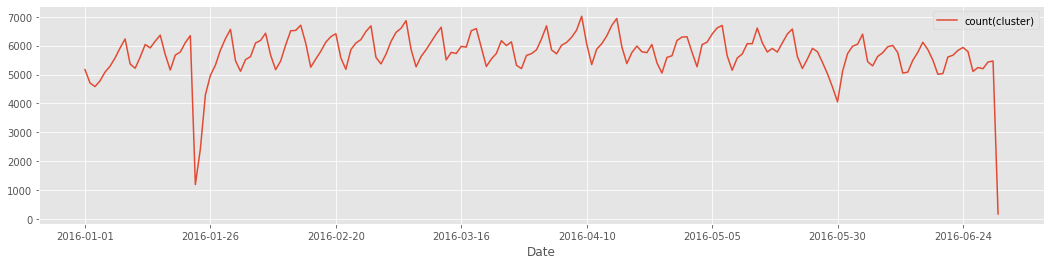

In [253]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

uber_trained_data_prediction_pandas = uber_trained_data_prediction_pandas.sort_values(['UDate'])
fig=uber_trained_data_prediction_pandas.plot(x="Date", y="count(cluster)", figsize=(18,4)) 
plt.show()

In [254]:
uber_trained = uber_trained_data_prediction_pandas.copy(True)
uber_trained['Date'] = pd.to_datetime(uber_trained['Date'])
uber_trained = uber_trained.set_index('Date')
uber_trained.drop('UDate',1,inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [255]:
def test_stationarity(timeseries):
         
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    #print(dftest)
    print(dfoutput)

In [256]:
test_stationarity(uber_trained)

Results of Dickey-Fuller Test:
Test Statistic                -6.170873e+00
p-value                        6.810363e-08
#Lags Used                     1.000000e+00
Number of Observations Used    1.810000e+02
Critical Value (1%)           -3.467005e+00
Critical Value (5%)           -2.877644e+00
Critical Value (10%)          -2.575355e+00
dtype: float64


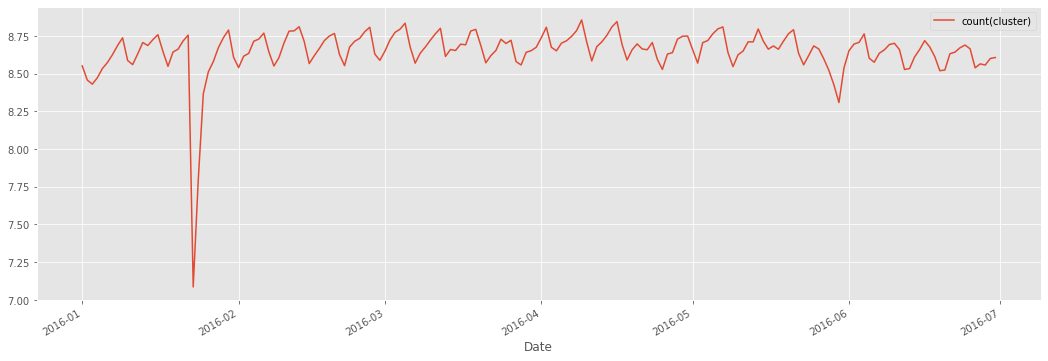

In [257]:
ts_log = np.log(uber_trained)

fig_log=ts_log.plot(figsize=(18, 6))
plt.show()

In [258]:
test_stationarity(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -3.482808
p-value                          0.008440
#Lags Used                       0.000000
Number of Observations Used    182.000000
Critical Value (1%)             -3.466800
Critical Value (5%)             -2.877555
Critical Value (10%)            -2.575308
dtype: float64


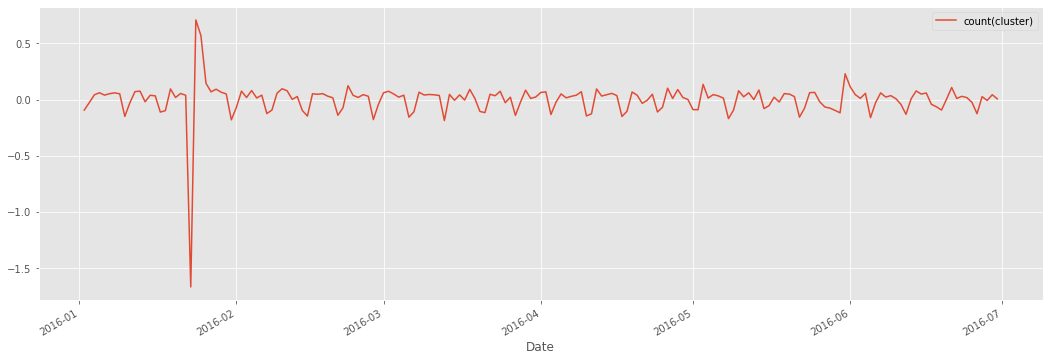

In [259]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.drop(ts_log_diff.index[0], inplace=True)

fig_log=ts_log_diff.plot(figsize=(18, 6))
plt.show()

In [260]:
test_stationarity(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -5.583127
p-value                          0.000001
#Lags Used                       3.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


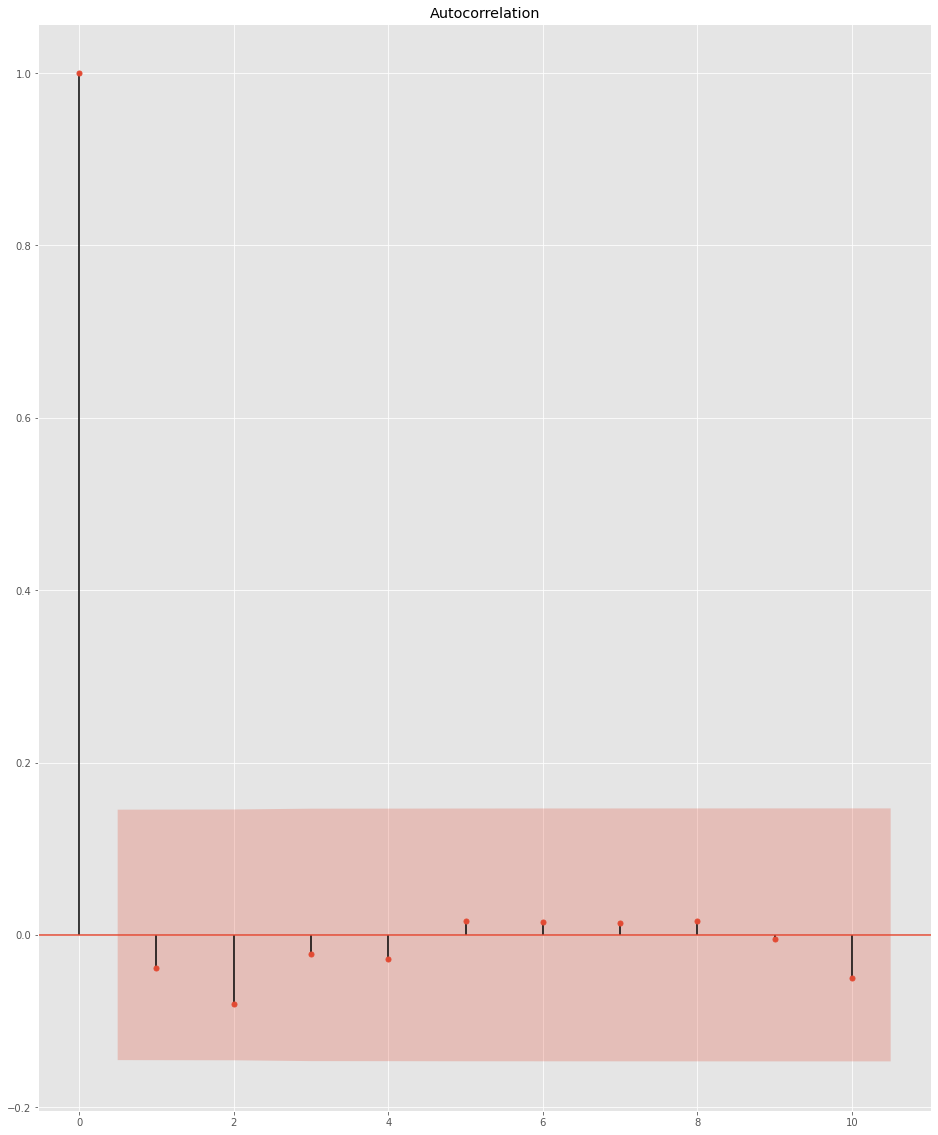

In [261]:
#ACF and PACF plots

lag_acf = plot_acf(ts_log_diff, lags=10)
plt.show()

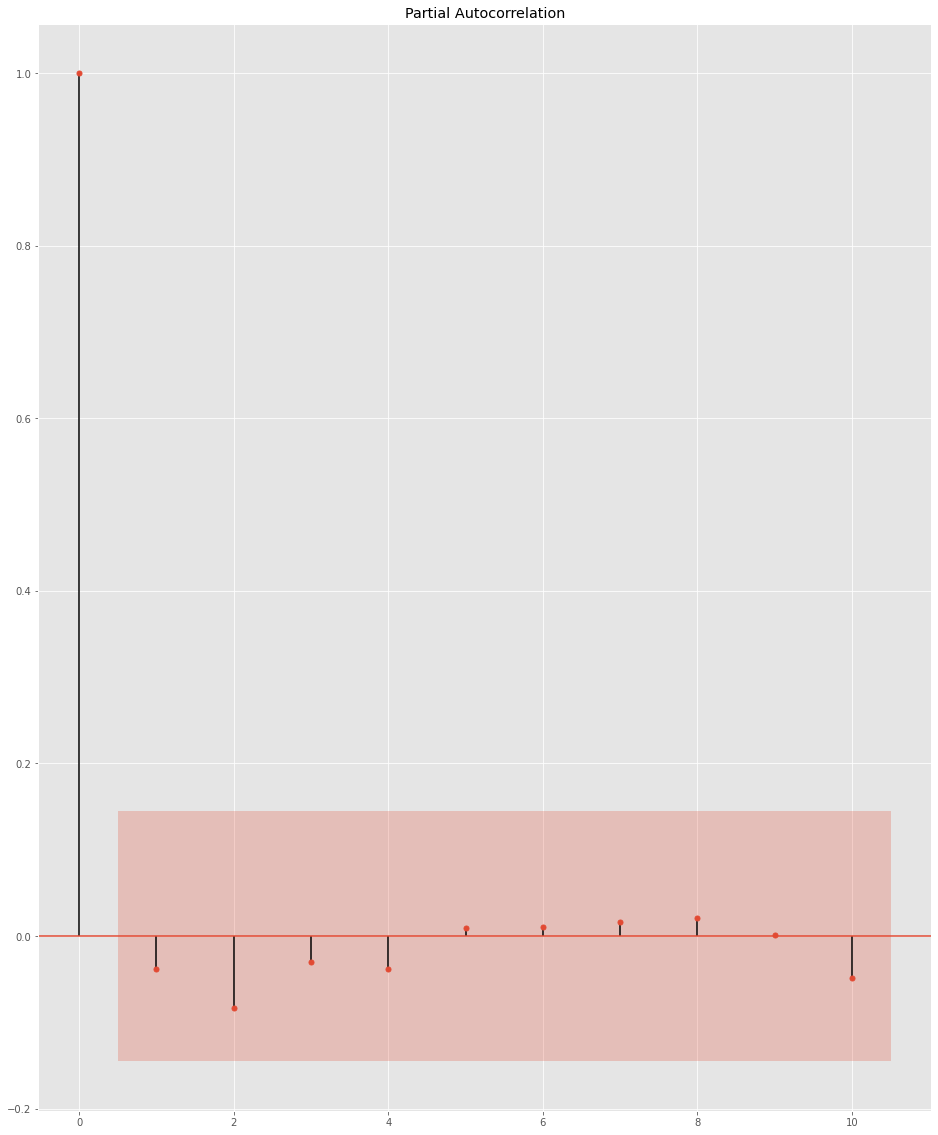

In [262]:
lag_pacf = plot_pacf(ts_log_diff, lags=10)
plt.show()

In [263]:
import math

model = ARIMA(ts_log_diff.astype(float), order=(7, 1, 2))   # uber_trained
results_ARIMA = model.fit(maxiter=500)  
print(results_ARIMA.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D.count(cluster)   No. Observations:                  181
Model:                 ARIMA(7, 1, 2)   Log Likelihood                 -35.154
Method:                       css-mle   S.D. of innovations              0.288
Date:                Sat, 23 Apr 2022   AIC                             92.308
Time:                        19:19:08   BIC                            127.492
Sample:                             1   HQIC                           106.573
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0003      0.000     -1.617      0.108      -0.001       6e-05
ar.L1.D.count(cluster)    -0.4397      1.606     -0.274      0.785      -3.588       2.708
ar.L

In [264]:
fitted_values  = results_ARIMA.predict(1,len(ts_log_diff)-1,typ='linear')  # uber_trained
fitted_values_frame = fitted_values.to_frame()

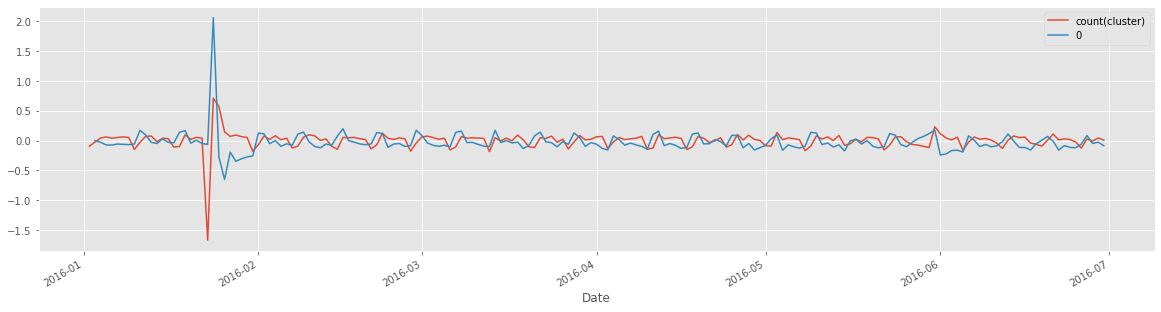

In [265]:
x = ts_log_diff.merge(fitted_values_frame, how='outer', left_index=True, right_index=True)  #uber_trained
fig= x.plot(figsize=(20,5))
plt.show()

                             ARIMA Model Results                              
Dep. Variable:       D.count(cluster)   No. Observations:                  181
Model:                 ARIMA(7, 1, 2)   Log Likelihood                 -35.154
Method:                       css-mle   S.D. of innovations              0.288
Date:                Sat, 23 Apr 2022   AIC                             92.308
Time:                        19:19:24   BIC                            127.492
Sample:                             1   HQIC                           106.573
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0003      0.000     -1.617      0.108      -0.001       6e-05
ar.L1.D.count(cluster)    -0.4397      1.606     -0.274      0.785      -3.588       2.708
ar.L

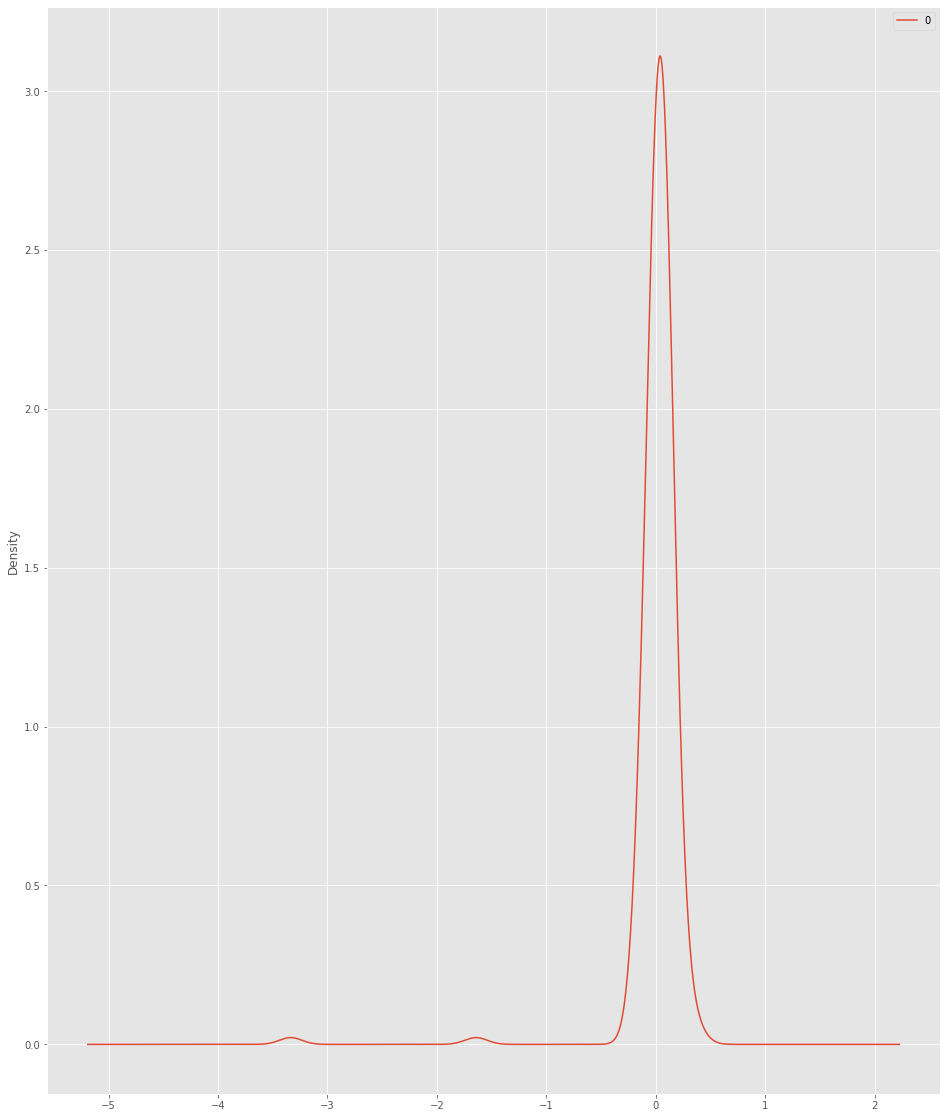

In [266]:
print(results_ARIMA.summary())
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())
plt.show()

In [268]:

uber_test_data_date_prediction = test.groupby(test['Date']).agg(count('Date'))
uber_test_data_date_prediction_u = uber_test_data_date_prediction.withColumn("UDate", unix_timestamp(uber_test_data_date_prediction['Date'], "MM/dd/yyyy"))
uber_test_data_date_prediction_pandas = uber_test_data_date_prediction_u.toPandas()
#uber_test_data_date_prediction_pandas.sort_values(['UDate']).plot(x="Date", y="count(prediction)")
uber_test = uber_test_data_date_prediction_pandas.sort_values(['UDate'])
uber_test['Date'] = pd.to_datetime(uber_test['Date'])
uber_test = uber_test.set_index('Date')
#uber_test = uber_test.drop('prediction', 1)
uber_test = uber_test.drop('UDate', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [272]:
test_log = np.log(uber_test)
test_log_diff = test_log - test_log.shift()

In [273]:
test_log_diff.fillna(0, inplace=True)

In [283]:
test_log_diff["TMP"] = test_log_diff.index.values                # index is a DateTimeIndex
test_log_diff = test_log_diff[test_log_diff.TMP.notnull()]                  # remove all NaT values
test_log_diff.drop(["TMP"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [284]:
model_test = ARIMA(test_log_diff.astype(float), order=(7, 1, 2))   # uber_trained
results_test_ARIMA = model_test.fit(maxiter=500) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669

In [285]:
fitted_values_test  = results_test_ARIMA.predict(1,len(test_log_diff)-1,typ='linear')  # uber_trained
fitted_values_test_frame = fitted_values_test.to_frame()

In [293]:
fitted_values_test_frame

,0
2016-01-02,-0.000042
2016-01-03,0.043787
2016-01-04,-0.032225
2016-01-05,-0.024777
2016-01-06,-0.078711
...,...
2016-06-26,0.023202
2016-06-27,0.123820
2016-06-28,0.055428
2016-06-29,-0.039656


None

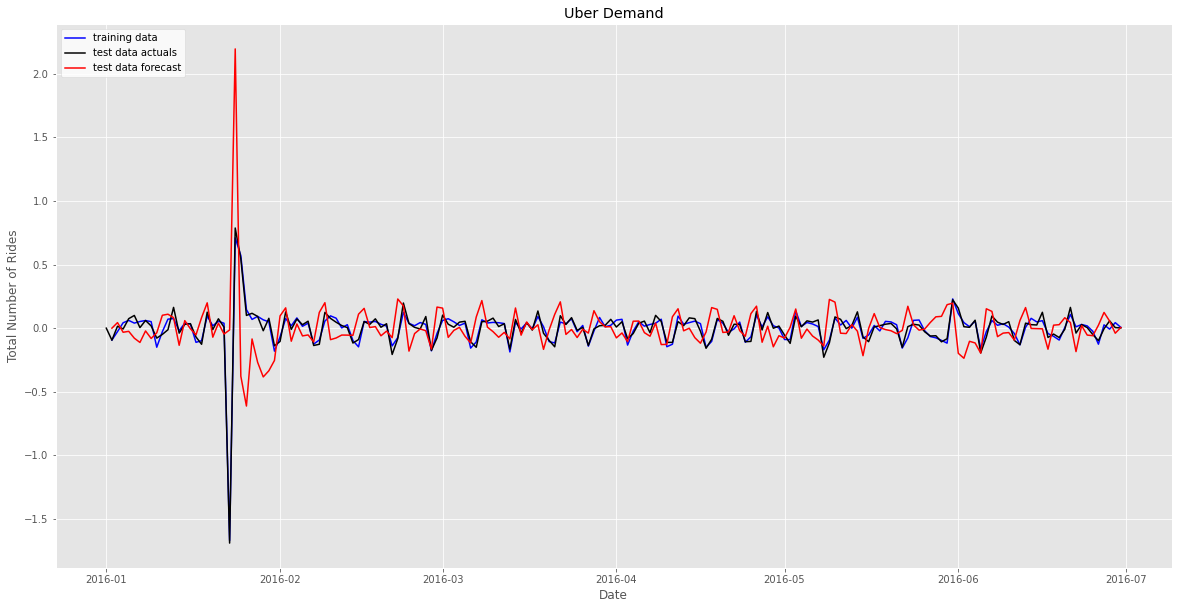

In [291]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set(title='Uber Demand', xlabel='Date', ylabel='Total Number of Rides')
ax.plot(ts_log_diff, 'blue', label='training data')  # uber_trained
ax.plot(test_log_diff, 'black', label='test data actuals')
ax.plot(fitted_values_test_frame, 'r', label='test data forecast')  # np.exp(predictions_series)
legend = ax.legend(loc='upper left')
legend.get_frame().set_facecolor('w')
display(fig.figure)

In [ ]:
plt.figure(figsize=(18,4))
sns.barplot(x="hour", y="count", data=fitted_values_test_frame.toPandas())
plt.title("Total Pickups By Hour");plt.figure(figsize=(18,4))
sns.barplot(x="hour", y="count", data=fitted_values_test_frame.toPandas())
plt.title("Total Pickups By Hour");